In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from non_param_effect_size import calc_non_param_ci, cles_ind, rbc_ind

%matplotlib inline


def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi

<IPython.core.display.Javascript object>

In [72]:
running = pd.read_csv("../data/running_playlist_tracks.csv")
running.drop(columns="Unnamed: 0", inplace=True)
gen = pd.read_csv("../data/sampled_set.csv")
gen.drop(columns="Unnamed: 0", inplace=True)
study = pd.read_csv("../data/study_playlist_tracks.csv")
study.drop(columns="Unnamed: 0", inplace=True)

<IPython.core.display.Javascript object>

In [73]:
# initialize colors to be used for visualizations
gen_bar_color = "#23d05fff"  # spotify green
gen_line_color = "#49ECF2"  # cyan

run_bar_color = "#233DD0"  # blue
run_line_color = "#CD5D00"  # orange

stud_bar_color = "#D02394"  # Pink
stud_line_color = "#8BE413"  # green

<IPython.core.display.Javascript object>

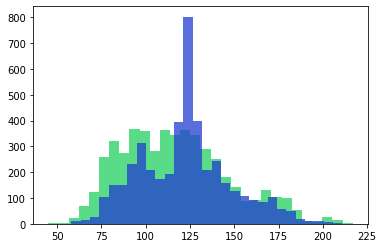

<IPython.core.display.Javascript object>

In [14]:
# Get rid of zeros because they represent either incomplete or erroneous data.
gen_filtered = gen[gen["tempo"] != 0]
run_filtered = running[running["tempo"] != 0]


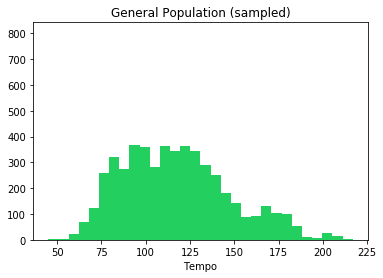

<IPython.core.display.Javascript object>

In [48]:
gen_filtered["tempo"].hist(bins=30, alpha=1, label="GP", color=gen_bar_color)
run_filtered["tempo"].hist(bins=30, alpha=0.0, label="Running", color=run_bar_color)
# plt.legend()
plt.grid(b=None)
plt.title("General Population (sampled)")
plt.xlabel("Tempo")
plt.savefig("../imgs/gen_tempo", transparent=True)
plt.show()

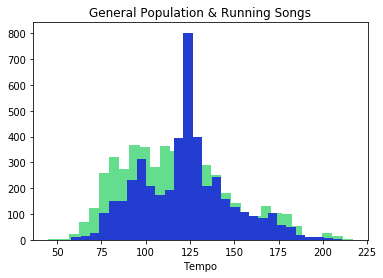

<IPython.core.display.Javascript object>

In [49]:
gen_filtered["tempo"].hist(bins=30, alpha=0.7, label="GP", color=gen_bar_color)
run_filtered["tempo"].hist(bins=30, alpha=1, label="Running", color=run_bar_color)
# plt.legend()
plt.grid(b=None)
plt.title("General Population & Running Songs")
plt.xlabel("Tempo")
plt.savefig("../imgs/run_gen_tempo", transparent=True)
plt.show()

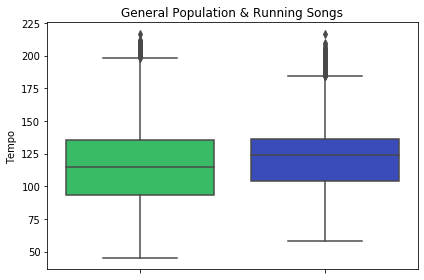

<IPython.core.display.Javascript object>

In [51]:
gen_temp = pd.DataFrame(data=gen_filtered["tempo"])
gen_temp = gen_temp.rename(columns={"tempo": "gen"})
run_temp = pd.DataFrame(run_filtered["tempo"])
run_temp = run_temp.rename(columns={"tempo": "run"})

box_df_tempo = pd.concat([gen_temp, run_temp], axis=1)

bp = sns.boxplot(data=box_df_tempo, palette=[gen_bar_color, run_bar_color])
# bp.set_xticklabels(("GP", "Running"))
bp.set_xticklabels([None])
plt.title("General Population & Running Songs")
plt.ylabel("Tempo")
plt.tight_layout()

plt.savefig("../imgs/box_run_gen_tempo", transparent=True)
plt.show()

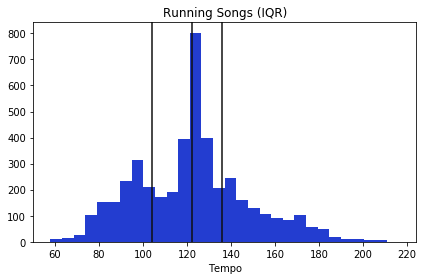

<IPython.core.display.Javascript object>

In [52]:
run_filtered["tempo"].hist(bins=30, alpha=1, color=run_bar_color)

# put lines at the mean and  IQR
line_col = "#0f0f0f"

plt.axvline(x=run_filtered["tempo"].mean(), color=line_col)
plt.axvline(x=run_filtered["tempo"].describe()["25%"], color=line_col)
plt.axvline(x=run_filtered["tempo"].describe()["75%"], color=line_col)

# plt.legend()
plt.grid(b=None)
plt.title("Running Songs (IQR)")
plt.xlabel("Tempo")
plt.tight_layout()
plt.savefig("../imgs/run_tempo_iqr_hist", transparent=True)
plt.show()

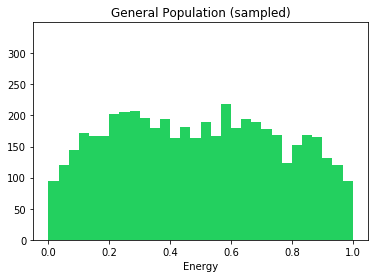

<IPython.core.display.Javascript object>

In [53]:
gen["energy"].hist(bins=30, alpha=1, color=gen_bar_color)
running["energy"].hist(bins=30, alpha=0.0, color=run_bar_color)
plt.grid(b=None)
plt.title("General Population (sampled)")
plt.xlabel("Energy")
plt.savefig("../imgs/gen_energy", transparent=True)
plt.show()

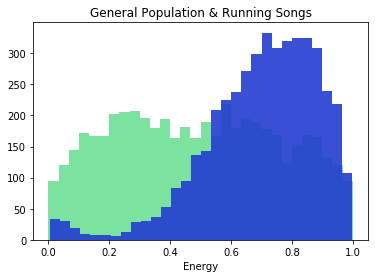

<IPython.core.display.Javascript object>

In [57]:
gen["energy"].hist(bins=30, alpha=0.6, color=gen_bar_color)
running["energy"].hist(bins=30, alpha=0.9, color=run_bar_color)


plt.grid(b=None)
plt.title("General Population & Running Songs")
plt.xlabel("Energy")
plt.savefig("../imgs/gen_run_energy", transparent=True)
plt.show()

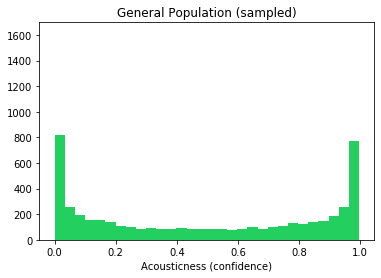

<IPython.core.display.Javascript object>

In [58]:
gen["acousticness"].hist(bins=30, alpha=1, color=gen_bar_color, label="GP")
running["acousticness"].hist(bins=30, alpha=0, color=run_bar_color, label="Running")
plt.grid(b=None)
plt.title("General Population (sampled)")
plt.xlabel("Acousticness (confidence)")
plt.savefig("../imgs/gen_acoustic", transparent=True)

plt.show()

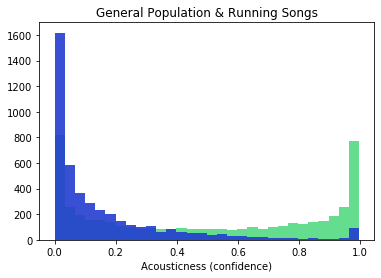

<IPython.core.display.Javascript object>

In [59]:
gen["acousticness"].hist(bins=30, alpha=0.7, color=gen_bar_color, label="GP")
running["acousticness"].hist(bins=30, alpha=0.9, color=run_bar_color, label="Running")
plt.grid(b=None)
plt.title("General Population & Running Songs")
plt.xlabel("Acousticness (confidence)")
plt.savefig("../imgs/gen_run_acoustic", transparent=True)

plt.show()

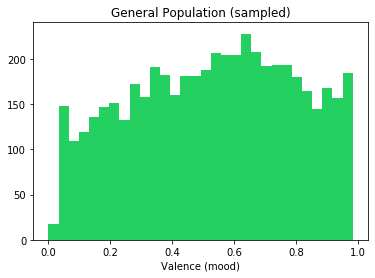

<IPython.core.display.Javascript object>

In [70]:
gen["valence"].hist(bins=30, alpha=1, color=gen_bar_color, label="GP")
running["valence"].hist(bins=30, alpha=0, color=run_bar_color, label="Running")
plt.grid(b=None)
plt.title("General Population (sampled)")
plt.xlabel("Valence (mood)")
plt.savefig("../imgs/gen_val", transparent=True)

plt.show()

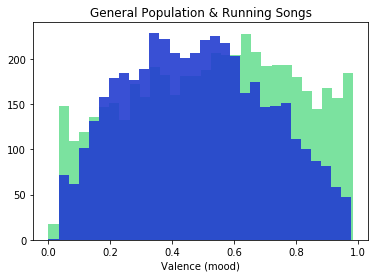

<IPython.core.display.Javascript object>

In [71]:
gen["valence"].hist(bins=30, alpha=0.6, color=gen_bar_color, label="GP")
running["valence"].hist(bins=30, alpha=0.9, color=run_bar_color, label="Running")
plt.grid(b=None)
plt.title("General Population & Running Songs")
plt.xlabel("Valence (mood)")
plt.savefig("../imgs/gen_run_val", transparent=True)

plt.show()

In [76]:
stud_filtered = study[study["tempo"] != 0]

<IPython.core.display.Javascript object>

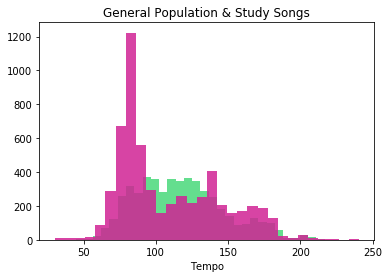

<IPython.core.display.Javascript object>

In [79]:
gen_filtered["tempo"].hist(bins=30, alpha=0.7, color=gen_bar_color)
stud_filtered["tempo"].hist(bins=30, alpha=0.85, color=stud_bar_color)
# plt.legend()
plt.grid(b=None)
plt.title("General Population & Study Songs")
plt.xlabel("Tempo")
plt.savefig("../imgs/stud_gen_tempo", transparent=True)
plt.show()

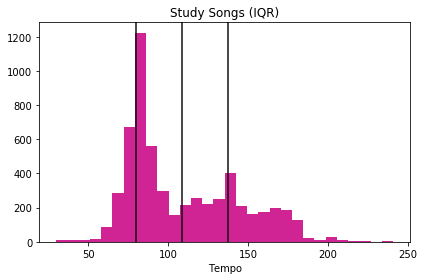

<IPython.core.display.Javascript object>

In [82]:
stud_filtered["tempo"].hist(bins=30, alpha=1, color=stud_bar_color)

# put lines at the mean and  IQR
line_col = "#0f0f0f"

plt.axvline(x=stud_filtered["tempo"].mean(), color=line_col)
plt.axvline(x=stud_filtered["tempo"].describe()["25%"], color=line_col)
plt.axvline(x=stud_filtered["tempo"].describe()["75%"], color=line_col)

# plt.legend()
plt.grid(b=None)
plt.title("Study Songs (IQR)")
plt.xlabel("Tempo")
plt.tight_layout()
plt.savefig("../imgs/stud_tempo_iqr_hist", transparent=True)
plt.show()

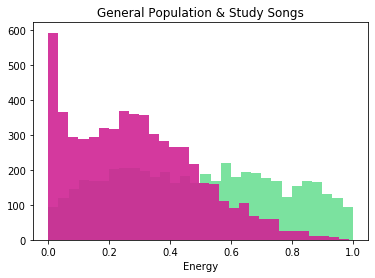

<IPython.core.display.Javascript object>

In [83]:
gen["energy"].hist(bins=30, alpha=0.6, color=gen_bar_color)
study["energy"].hist(bins=30, alpha=0.9, color=stud_bar_color)


plt.grid(b=None)
plt.title("General Population & Study Songs")
plt.xlabel("Energy")
plt.savefig("../imgs/gen_srud_energy", transparent=True)
plt.show()

In [60]:
from statsmodels.stats.power import TTestIndPower


<IPython.core.display.Javascript object>

In [61]:
x1 = gen["valence"]
x2 = running["valence"]

<IPython.core.display.Javascript object>

In [62]:
s_pooled_numerator = (x1.size - 1) * x1.var() + (x2.size - 1) * x2.var()
s_pooled_denominator = x1.size + x2.size - 2

s_pooled = np.sqrt(s_pooled_numerator / s_pooled_denominator)

effect_size = (x1.mean() - x2.mean()) / s_pooled
effect_size

0.20426374732418423

<IPython.core.display.Javascript object>

In [65]:
_, p = stats.ttest_ind(gen["valence"], running["valence"])

<IPython.core.display.Javascript object>

In [66]:
analysis = TTestIndPower()
analysis.solve_power(
    effect_size=effect_size, alpha=p, nobs1=x1.size, ratio=x1.size / x2.size
)

0.7226205186808824

<IPython.core.display.Javascript object>